In [1]:
# Importing necessary modules to analyze and visualize the climate of Honolulu, Hawaii.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import pandas as pd
import matplotlib.dates as mdates
from sqlalchemy.sql import label

In [2]:
# setting path to hawaii.sqlite file.
database_path = "../Resources/hawaii.sqlite"

In [3]:
# creating a variable that creates and holds the starting point and home base of interaction between us(python) and the hawaii.sqlite database/local files.
engine = create_engine(f"sqlite:///{database_path}")

In [4]:
# using the automap_base  and prepare functions to create an automated mapping of the hawaii.sqlite database, such as a general layout of how the data is structured and related.
Base = automap_base()
# Using the prepare function to reflect the mapping.
Base.prepare(engine, reflect=True)

In [5]:
# Using the functional Base variable created above to find out the names of the hawaii.sqlite classes/tables the automapping above created.
Base.classes.keys()

['measurement', 'station']

In [6]:
# saving the tabels that the automapping is referencing to variables for operation later on.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# creating a session variable that will allow the our python scripts to communicate with the hawaii database.
session = Session(engine)

In [8]:
# using the __dict__ function to get a feel for the mapping of the Measurement table.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29430962080>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [9]:
# using the __dict__ function like above to see the station data.
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29430962518>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [10]:
# seeing how  many years of data we have(2010-2017).
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# obtaining only the date and precipiation columns and filtering out so we only have the last 12 months of data.
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()
# previewing data
last_12_months[0:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [12]:
# creating a prcp dataframe out of the data_2017 data created above.
prcp_last_12_months = pd.DataFrame(last_12_months)

In [13]:
# reformatting the date column from object to datestamp.
prcp_last_12_months["date"] = prcp_last_12_months["date"].astype("datetime64[ns]")

In [14]:
# previewing prcp_data_2017 data
prcp_last_12_months.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [15]:
# setting prcp_data_2017 index as date.
prcp_last_12_months = prcp_last_12_months.set_index("date")

In [16]:
# sorting the pandas_data_2017 to have all dates appear in order.
sorted_prcp_last_12_months= prcp_last_12_months.sort_index()

In [17]:
# verifying the data is sorted by dates.
sorted_prcp_last_12_months.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [21]:
# dropping all rows with NaN entries/cleaning up the data. 
sorted_prcp_last_12_months = sorted_prcp_last_12_months.dropna()
# previewing the changes made worked.
sorted_prcp_last_12_months.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


In [22]:
# creating a dictionary out of sorted_prcp dataframe with dates as the keys.
prcp_dict = sorted_prcp_last_12_months.reset_index()
# converting date column to string.
prcp_dict["date"] = prcp_dict["date"].astype(str)
# using pivot funtion to put all precipitations by station recored on same date into own column by that date, instead of data only in one column. 
prcp_dict = prcp_dict.pivot(columns="date", values="prcp")
# looping through columns to not include NaN entries and subsequently creating a dictionary.
prcp_dict = {col: prcp_dict[col].dropna().to_dict() for col in prcp_dict}
# # previewing results.
prcp_dict["2016-08-23"]

{0: 0.0, 1: 1.79, 2: 0.05, 3: 0.15, 4: 0.7, 5: 0.02}

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

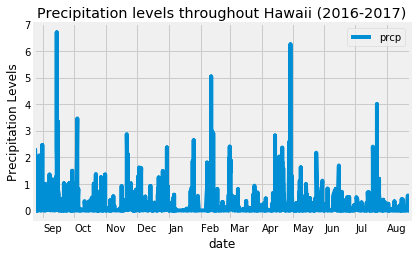

In [23]:
# creating a barchart that measures precipitation levels throughout the last 12 months by stations.
fig, ax = plt.subplots()
sorted_prcp_last_12_months.plot(ax=ax)
# creating labels for the barchart.
plt.title("Precipitation levels throughout Hawaii (2016-2017)")
plt.ylabel("Precipitation Levels")
# #set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-0, ha="left" )
# saving bargraph as png file.
# plt.savefig("Precipitation levels throughout Hawaii in last 12 months")

In [24]:
# calculating the total number of weather stations in our database in hawaii.
number_of_stations = session.query(Station.id, Station.name).count()
print(f"There are {number_of_stations} stations in our hawaii database")

There are 9 stations in our hawaii database


In [25]:
# counting the number of observations(temperature observations data) of each station from 2010-2017 and recording them in order from greatest to least in a list variable.
observation_count = session.query(Station.name, Measurement.station, func.count(Measurement.tobs)).\
    filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [26]:
# checking the results of the observation count query preformed above that is contained in a list variable.
observation_count

[('WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('PEARL CITY, HI US', 'USC00517948', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [27]:
# printing what station had most temperature observations from 2010-2017 and the corresponding number of recordings.
print(f"Station {observation_count[0][0]} had the most temperature observation data recordings totaling {observation_count[0][2]} from 2011-2017.")

Station WAIHEE 837.5, HI US had the most temperature observation data recordings totaling 2772 from 2011-2017.


In [28]:
# counting the number of temperature observations for last 12 months of data according to each station and ordering them from greatest to least within a list variable.
tobs_data = session.query(Station.name, Measurement.station, Measurement.tobs, func.count(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [29]:
# checking the results of the above procudure held in the tobs_data variable.
tobs_data

[('WAIKIKI 717.2, HI US', 'USC00519397', 81.0, 361),
 ('WAIHEE 837.5, HI US', 'USC00519281', 77.0, 352),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 74.0, 349),
 ('KANEOHE 838.1, HI US', 'USC00513117', 76.0, 343),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 80.0, 337),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 80.0, 305),
 ('PEARL CITY, HI US', 'USC00517948', 80.0, 183)]

In [30]:
# verifing name of the station with most frequent temp observations.
tobs_data[0][0]

'WAIKIKI 717.2, HI US'

In [31]:
# Based on the above filtration, filtering the data to give us only the data of the station that had the most temperature observations for last 12 months.
most_frequent_station = session.query(Measurement.station, Station.name, Measurement.tobs, Measurement.date).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").\
    filter(Station.name == tobs_data[0][0]).all()

In [32]:
# verifing the above process worked.
most_frequent_station[0:10]

[('USC00519397', 'WAIKIKI 717.2, HI US', 81.0, '2016-08-23'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 79.0, '2016-08-24'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 80.0, '2016-08-25'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 79.0, '2016-08-26'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 77.0, '2016-08-27'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 78.0, '2016-08-28'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 78.0, '2016-08-29'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 79.0, '2016-08-30'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 80.0, '2016-08-31'),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 81.0, '2016-09-01')]

In [33]:
# creating a pandas dataframe from above list in order to create a histogram.
tob_most_frequent_station = pd.DataFrame(most_frequent_station, columns=["Station", "Name of Station", "Temperature Observation", "Date"])

In [34]:
# removing the station columnns and date column.
tob_most_frequent_station = tob_most_frequent_station[["Name of Station", "Temperature Observation"]]

In [35]:
# previewing the pandas_most_frequent_data dataframe.
tob_most_frequent_station.head()

,Name of Station,Temperature Observation
0,"WAIKIKI 717.2, HI US",81.0
1,"WAIKIKI 717.2, HI US",79.0
2,"WAIKIKI 717.2, HI US",80.0
3,"WAIKIKI 717.2, HI US",79.0
4,"WAIKIKI 717.2, HI US",77.0


(60, 83)

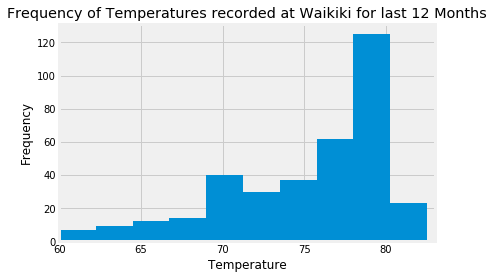

In [36]:
# creating a histogram that shows the most frequent temperature observations in the last 12 months at Waikiki, which had the most temperature observations out of all the weather stations..
tob_most_frequent_station.hist(bins=12)
# labeling the histogram.
plt.title("Frequency of Temperatures recorded at Waikiki for last 12 Months")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.xlim(60,83)
# saving histogram as png file.
# plt.savefig("Frequency of Temperatures recorded at Waikiki (station with most observations) for last 12 Months")

In [37]:
# Bonus Section

In [38]:
# Temperature Analysis 1

In [39]:
# importing scripy module in order to perform t-test.
from scipy.stats import ttest_ind
import scipy

In [40]:
# setting June month number id to variable.
date_str = "06"
# querying for June month temperature data using the date_str varaible and func.strftime and setting to variable and finding the average temperature.
june_average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()
print(f'The average temperature of June in Hawaii is {june_average_temperature[0][0]} degrees fahrenheit')

The average temperature of June in Hawaii is 74.94411764705882 degrees fahrenheit


In [41]:
# setting December month number id to variable.
date_str = "12"
# querying for December month temperature data using the date_str varaible and func.strftime and setting to variable and finding the average temperature.
december_average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()
# print(f"The average temperature of December is {december_average_temperature}")
print(f'The average temperature of December in Hawaii is {december_average_temperature[0][0]} degrees fahrenheit')

The average temperature of December in Hawaii is 71.04152933421226 degrees fahrenheit


In [42]:
# calculating t-score between June and December temperatures from 2010-2017.

In [43]:
# setting June month number id to variable.
date_str = "06"
# querying for June month temperature data to get all June month temperature data.
june_temperature = session.query(Measurement.tobs, Measurement.date).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()

In [44]:
# setting December month number id to variable.
date_str = "12"
# querying for December month temperature data to get all December month data.
december_temperature = session.query(Measurement.tobs, Measurement.date).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()

In [45]:
# creating pandas dataframes out of above lists to find t-score.
june = pd.DataFrame(june_temperature)
december = pd.DataFrame(december_temperature)

In [46]:
# calculating the t-score between June and December.
scipy.stats.ttest_rel(june["tobs"], december["tobs"])

ValueError: unequal length arrays

The paired ttest tells us that June and December are statistically significant.

In [47]:
# Temperature analsis II

In [48]:
# Calculating min, max, average temperature for previous year before my trip.

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(label('low', func.min(Measurement.tobs)), label('average', func.avg(Measurement.tobs)), label('high', func.max(Measurement.tobs))).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# using the above function to get that stats I want to inform me about possible future weather.
my_trip_weather = calc_temps('2017-05-12', '2018-05-12')
# previewing the results.
my_trip_weather

[(68.0, 77.49149659863946, 87.0)]

In [50]:
diff = my_trip_weather[0][2] - my_trip_weather[0][0]

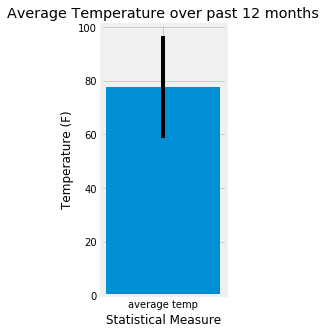

In [52]:
# creating an errobar chart that will visualize average temperature and the difference of the max and min temperature as the error bar.
fig, ax = plt.subplots(figsize=(2,5))
ax.bar("average temp", my_trip_weather[0][1], yerr=diff)
# putting all of the labels on barchart.
plt.title("Average Temperature over past 12 months")
plt.xlabel("Statistical Measure")
plt.ylabel("Temperature (F)")
# plt.savefig("Average Temperatur over past 12 months (bonus)")